In [118]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [120]:
df = pd.read_csv('placement.csv')

In [122]:
df.head()
df.shape
df.describe()

,cgpa,package
count,200.000000,200.000000
mean,6.990500,2.996050
std,1.069409,0.691644
min,4.260000,1.370000
25%,6.190000,2.487500
50%,6.965000,2.995000
75%,7.737500,3.492500
max,9.580000,4.620000


Text(0, 0.5, 'Package(in lac)')

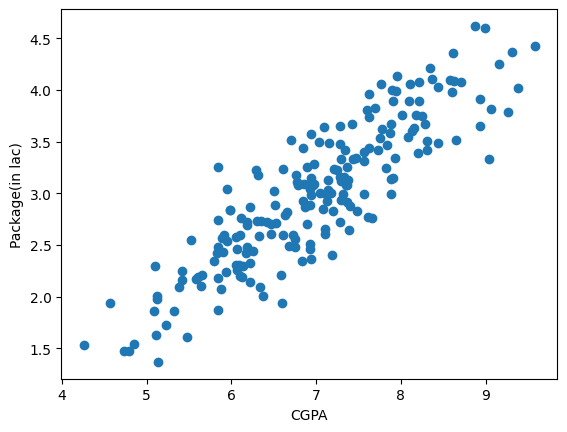

In [124]:
plt.scatter(df['cgpa'],df['package'])
plt.xlabel('CGPA')
plt.ylabel('Package(in lac)')

In [126]:
X = df.iloc[:,0:1]
y = df.iloc[:,-1]

In [128]:
y

0      3.26
1      1.98
2      3.25
3      3.67
4      3.57
       ... 
195    2.46
196    2.57
197    3.24
198    3.96
199    2.33
Name: package, Length: 200, dtype: float64

In [132]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [134]:
from sklearn.linear_model import LinearRegression

In [136]:
lr = LinearRegression()

In [138]:
lr.fit(X_train,y_train)

LinearRegression()

Text(0, 0.5, 'Package(in lpa)')

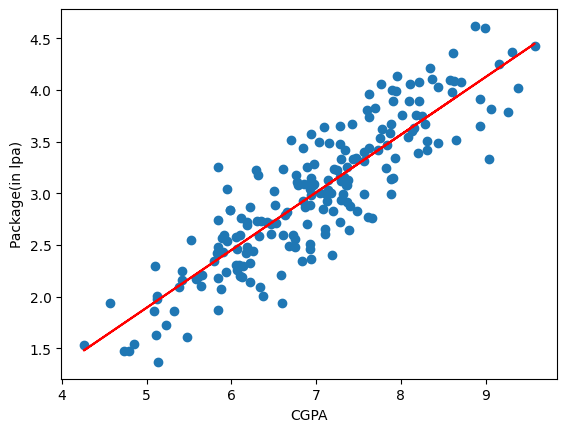

In [140]:
plt.scatter(df['cgpa'],df['package'])
plt.plot(X_train,lr.predict(X_train),color='red')
plt.xlabel('CGPA')
plt.ylabel('Package(in lpa)')

In [142]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [144]:
y_pred = lr.predict(X_test)

In [146]:
y_test.values

array([4.1 , 3.49, 2.08, 2.33, 1.94, 1.48, 1.86, 3.09, 4.21, 2.87, 3.65,
       4.  , 2.89, 2.6 , 2.99, 3.25, 1.86, 3.67, 2.37, 3.42, 2.48, 3.65,
       2.6 , 2.83, 4.08, 2.56, 3.58, 3.81, 4.09, 2.01, 3.63, 2.92, 3.51,
       1.94, 2.21, 3.34, 3.34, 3.23, 2.01, 2.61])

In [148]:
print("MAE",mean_absolute_error(y_test,y_pred))

MAE 0.2884710931878175


In [150]:
print("MSE",mean_squared_error(y_test,y_pred))

MSE 0.12129235313495527


In [152]:
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred)))

RMSE 0.34827051717731616


In [154]:
print("MSE",r2_score(y_test,y_pred))
r2 = r2_score(y_test,y_pred)

MSE 0.780730147510384


In [156]:
# Adjusted R2 score
X_test.shape

(40, 1)

In [158]:
1 - ((1-r2)*(40-1)/(40-1-1))

0.7749598882343415

In [162]:
new_df1 = df.copy()
new_df1['random_feature'] = np.random.random(200)

new_df1 = new_df1[['cgpa','random_feature','package']]
new_df1.head()

,cgpa,random_feature,package
0,6.89,0.427336,3.26
1,5.12,0.324287,1.98
2,7.82,0.793611,3.25
3,7.42,0.497762,3.67
4,6.94,0.300517,3.57


Text(0, 0.5, 'Package(in lpa)')

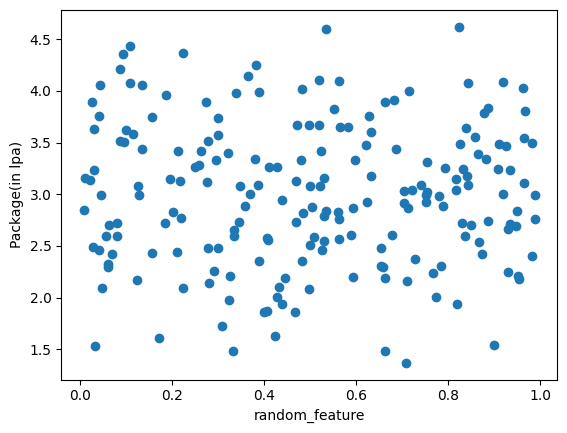

In [164]:
plt.scatter(new_df1['random_feature'],new_df1['package'])
plt.xlabel('random_feature')
plt.ylabel('Package(in lpa)')

In [166]:
X = new_df1.iloc[:,0:2]
y = new_df1.iloc[:,-1]

In [168]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [170]:
lr = LinearRegression()

In [172]:
lr.fit(X_train,y_train)

LinearRegression()

In [174]:
y_pred = lr.predict(X_test)

In [176]:
print("R2 score",r2_score(y_test,y_pred))
r2 = r2_score(y_test,y_pred)

R2 score 0.7787475457988186


In [178]:
1 - ((1-r2)*(40-1)/(40-1-2))

0.7667879536798358

In [180]:
new_df2 = df.copy()

new_df2['iq'] = new_df2['package'] + (np.random.randint(-12,12,200)/10)

new_df2 = new_df2[['cgpa','iq','package']]

In [182]:
new_df2.sample(5)

,cgpa,iq,package
96,7.11,2.61,2.61
74,6.85,3.94,3.44
121,6.50,2.72,3.02
88,4.73,1.38,1.48
80,7.63,2.24,3.44


Text(0, 0.5, 'Package(in lpa)')

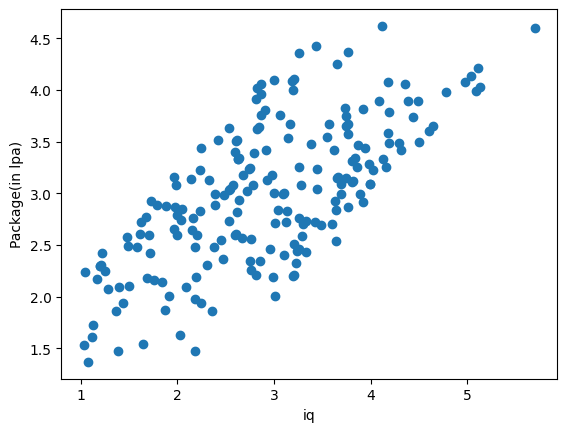

In [184]:
plt.scatter(new_df2['iq'],new_df2['package'])
plt.xlabel('iq')
plt.ylabel('Package(in lpa)')

In [186]:
np.random.randint(-100,100)

-13

In [188]:
X = new_df2.iloc[:,0:2]
y = new_df2.iloc[:,-1]

In [190]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [192]:
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

In [194]:
print("R2 score",r2_score(y_test,y_pred))
r2 = r2_score(y_test,y_pred)

R2 score 0.8225056164884974


In [196]:
1 - ((1-r2)*(40-1)/(40-1-2))

0.8129113254878757